This code provides maximum yield of the crop ,the solution also provides the weather forecast to alert farmers in case of any bad weather.plotting the graphs we will be able to decide the type of crop

In [77]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [3]:
k=pd.read_csv('/home/lakshay/Music/jowarf.csv')

In [4]:
k.head()

,crop,Temp,Rai-n fall,Soil-1 Type,Soil Moisture,Top,PH,EC,N,P,K,S,yield
0,j,28,0,l,60,l,5,2.0,56,46,48,28,1002
1,j,28,0,l,60,l,5,2.0,56,45,48,28,1506
2,j,29,30,l,65,l,5,2.1,56,37,45,29,1462
3,j,27,30,l,67,l,6,2.1,67,50,45,27,1302
4,j,27,45,l,67,l,6,2.1,67,47,45,27,1008


In [5]:
k

,crop,Temp,Rai-n fall,Soil-1 Type,Soil Moisture,Top,PH,EC,N,P,K,S,yield
0,j,28,0,l,60,l,5,2.0,56,46,48,28,1002
1,j,28,0,l,60,l,5,2.0,56,45,48,28,1506
2,j,29,30,l,65,l,5,2.1,56,37,45,29,1462
3,j,27,30,l,67,l,6,2.1,67,50,45,27,1302
4,j,27,45,l,67,l,6,2.1,67,47,45,27,1008
5,j,29,35,l,67,l,6,2.1,67,46,46,29,1105
6,j,29,35,l,67,l,6,2.1,67,47,46,29,1245
7,j,33,36,l,67,l,5,2.1,78,47,44,33,1365
8,j,32,38,l,67,l,5,2.1,67,47,47,32,1452
9,j,30,45,l,70,l,5,2.1,77,48,47,30,1255


In [6]:
numeric_data=k.select_dtypes(include=[np.number])
cat_data=k.select_dtypes(exclude=[np.number])

In [7]:
numeric_data

,Temp,Rai-n fall,Soil Moisture,PH,EC,N,P,K,S,yield
0,28,0,60,5,2.0,56,46,48,28,1002
1,28,0,60,5,2.0,56,45,48,28,1506
2,29,30,65,5,2.1,56,37,45,29,1462
3,27,30,67,6,2.1,67,50,45,27,1302
4,27,45,67,6,2.1,67,47,45,27,1008
5,29,35,67,6,2.1,67,46,46,29,1105
6,29,35,67,6,2.1,67,47,46,29,1245
7,33,36,67,5,2.1,78,47,44,33,1365
8,32,38,67,5,2.1,67,47,47,32,1452
9,30,45,70,5,2.1,77,48,47,30,1255


In [8]:
numeric_data.shape[1]

10

In [9]:
cat_data

,crop,Soil-1 Type,Top
0,j,l,l
1,j,l,l
2,j,l,l
3,j,l,l
4,j,l,l
5,j,l,l
6,j,l,l
7,j,l,l
8,j,l,l
9,j,l,l


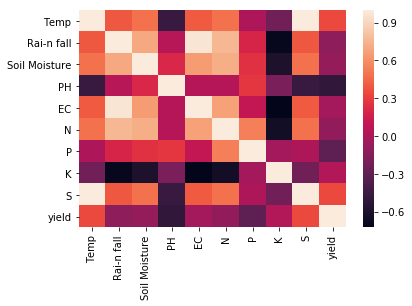

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=numeric_data.corr()
sns.heatmap(corr)
plt.show()

In [11]:
numeric_data

,Temp,Rai-n fall,Soil Moisture,PH,EC,N,P,K,S,yield
0,28,0,60,5,2.0,56,46,48,28,1002
1,28,0,60,5,2.0,56,45,48,28,1506
2,29,30,65,5,2.1,56,37,45,29,1462
3,27,30,67,6,2.1,67,50,45,27,1302
4,27,45,67,6,2.1,67,47,45,27,1008
5,29,35,67,6,2.1,67,46,46,29,1105
6,29,35,67,6,2.1,67,47,46,29,1245
7,33,36,67,5,2.1,78,47,44,33,1365
8,32,38,67,5,2.1,67,47,47,32,1452
9,30,45,70,5,2.1,77,48,47,30,1255


In [105]:
x=numeric_data.iloc[:,:-1].values
y=numeric_data.iloc[:,9].values

In [104]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#clf=tree.DecisionTreeClassifier

In [59]:
#clf.fit(x_train,y_train)

In [106]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [108]:
y_pred=knn.predict(x_test)

In [96]:
#y_pred=clf.predict(x_test)
#y_pred

In [109]:
y_pred

array([1002, 1105, 1105])

In [111]:
y_test

array([1232, 1008, 1462])

In [112]:
metrics.accuracy_score(y_test,y_pred)

0.0

In [50]:
from sklearn import metrics

In [56]:
metrics.accuracy_score(y_test,y_pred)

0.0

In [20]:
import seaborn as sns
%matplotlib inline

In [21]:
numeric_data

,Temp,Rai-n fall,Soil Moisture,PH,EC,N,P,K,S,yield
0,28,0,60,5,2.0,56,46,48,28,1002
1,28,0,60,5,2.0,56,45,48,28,1506
2,29,30,65,5,2.1,56,37,45,29,1462
3,27,30,67,6,2.1,67,50,45,27,1302
4,27,45,67,6,2.1,67,47,45,27,1008
5,29,35,67,6,2.1,67,46,46,29,1105
6,29,35,67,6,2.1,67,47,46,29,1245
7,33,36,67,5,2.1,78,47,44,33,1365
8,32,38,67,5,2.1,67,47,47,32,1452
9,30,45,70,5,2.1,77,48,47,30,1255


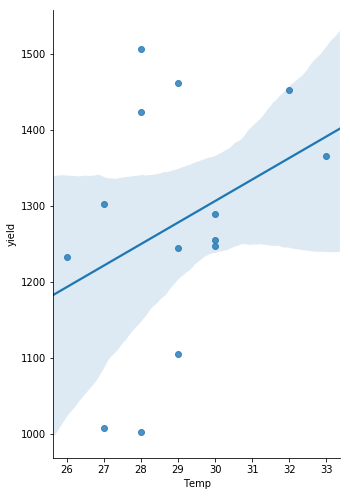

In [22]:
sns.pairplot(numeric_data,x_vars=['Temp',],y_vars=['yield'],size=7,aspect=0.7,kind='reg')

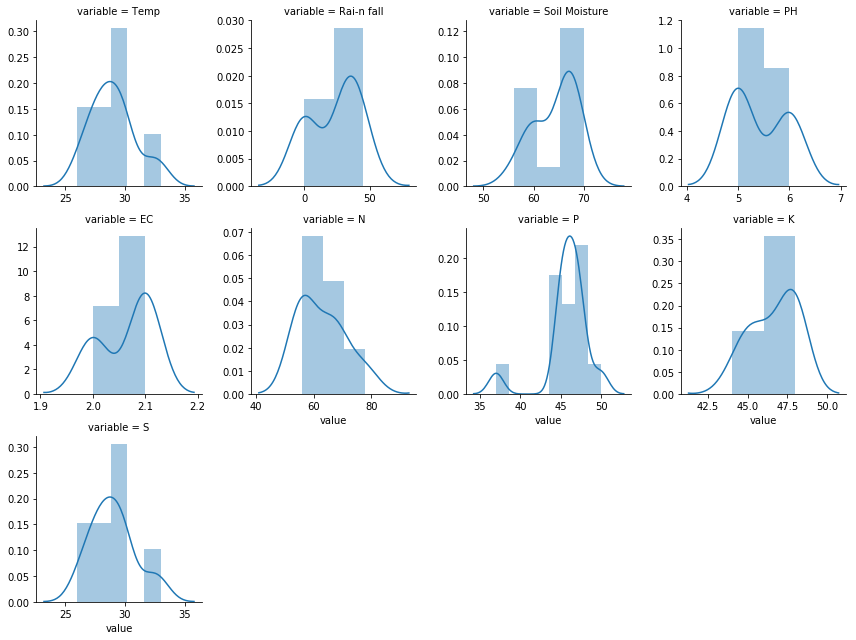

In [23]:
#create numeric plots
num = [f for f in numeric_data.columns[:-1] if numeric_data.dtypes[f] != 'object']
nd = pd.melt(numeric_data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [24]:
num

['Temp', 'Rai-n fall', 'Soil Moisture', 'PH', 'EC', 'N', 'P', 'K', 'S']

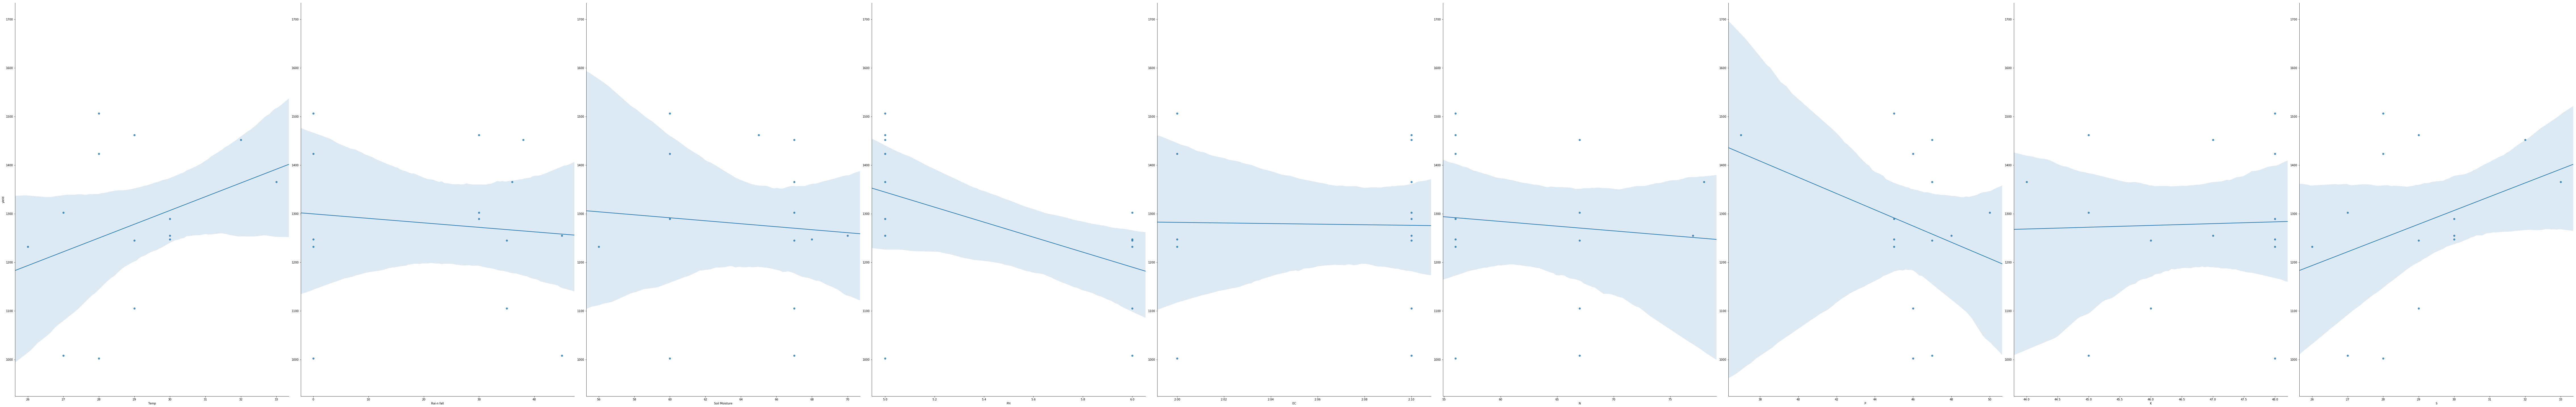

In [29]:
sns.pairplot(numeric_data,x_vars=num,y_vars=['yield'],size=20,aspect=0.7,kind='reg')

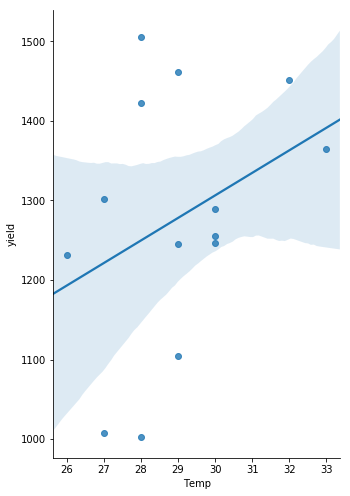

In [32]:
sns.pairplot(numeric_data,x_vars=['Temp'],y_vars=['yield'],size=7,aspect=0.7,kind='reg']

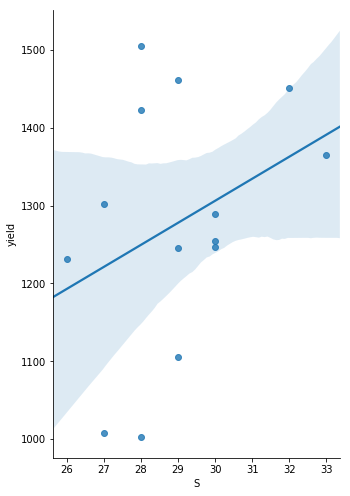

In [33]:
sns.pairplot(numeric_data,x_vars=['S'],y_vars=['yield'],size=7,aspect=0.7,kind='reg')

In [48]:
list1={'best_temp':max(numeric_data['Temp'])}
list1

{'best_temp': 33}